# Image Processing With Mr.Meeseeks

## Peyman hashemi

Nov 2022

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.color import rgb2hsv, hsv2rgb
from skimage.io import imread, imshow
from skimage.exposure import histogram, cumulative_distribution
from skimage import img_as_ubyte, img_as_float
from scipy.stats import norm
import time

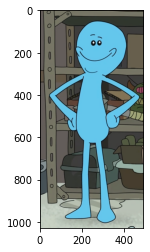

In [2]:
image = cv2.imread(r'C:\Users\Asus\Desktop\AUT\semister 3\vision\EX\1\HW01\MeeseeksHQ.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

(<matplotlib.image.AxesImage at 0x23ff4271a60>,
 <matplotlib.image.AxesImage at 0x23ff4271d90>)

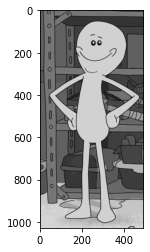

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image) , plt.imshow(gray_image , cmap = 'gray')

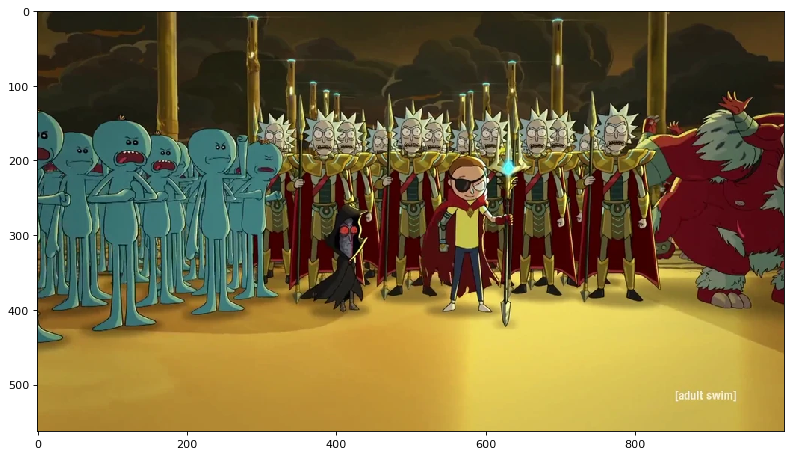

In [8]:
meeskees = cv2.imread(r'C:\Users\Asus\Desktop\AUT\semister 3\vision\EX\1\HW01\mr meeskees.png')
meeskees = cv2.cvtColor(meeskees, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
imshow(meeskees)

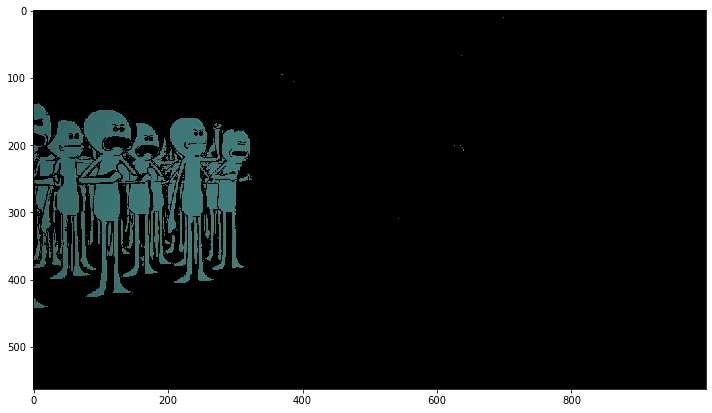

In [114]:
meeskees_mask = cv2.inRange(meeskees, np.array([45, 85, 95]),  np.array([85, 145, 145]))
meeskees_result = cv2.bitwise_and(meeskees, meeskees, mask =  meeskees_mask) 
plt.figure( figsize=(10, 8))
imshow(meeskees_result)

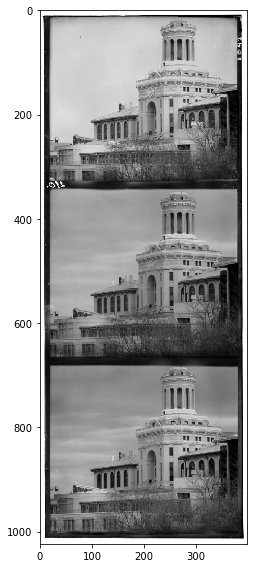

In [21]:
image3 = cv2.imread(r'C:\Users\Asus\Desktop\AUT\semister 3\vision\EX\1\HW01\01.jpg')
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
plt.figure( figsize=(10, 8))
imshow(image3)

323

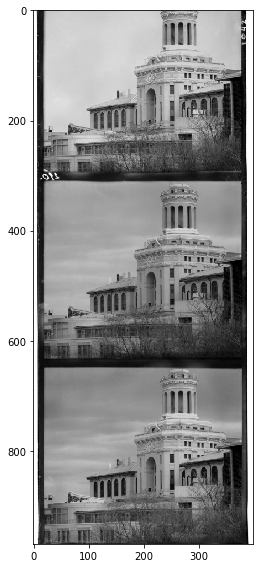

In [39]:
image_borderless=image3[33:len(image3)-22]
plt.figure( figsize=(10, 8))
imshow(image_borderless)
image_borderless.shape

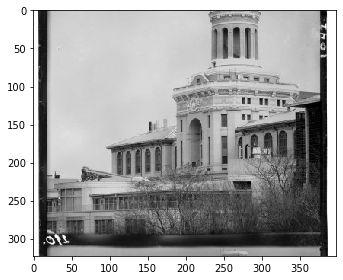

In [56]:
index= []
lengh_third=int(image_borderless.shape[0]/3)
for i in range(0,3):
    index.append(image_borderless[lengh_third *i: lengh_third * (i+1) , :])
index[1].shape
imshow(index[0])

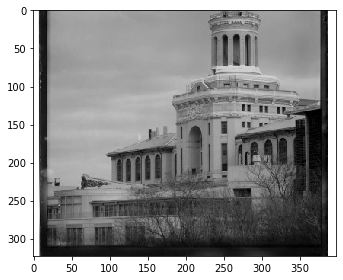

In [115]:
imshow(index[1])

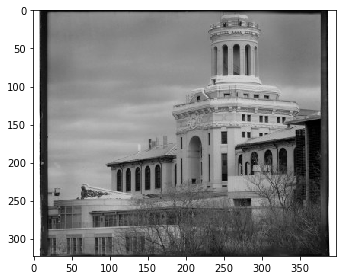

In [116]:
imshow(index[2])

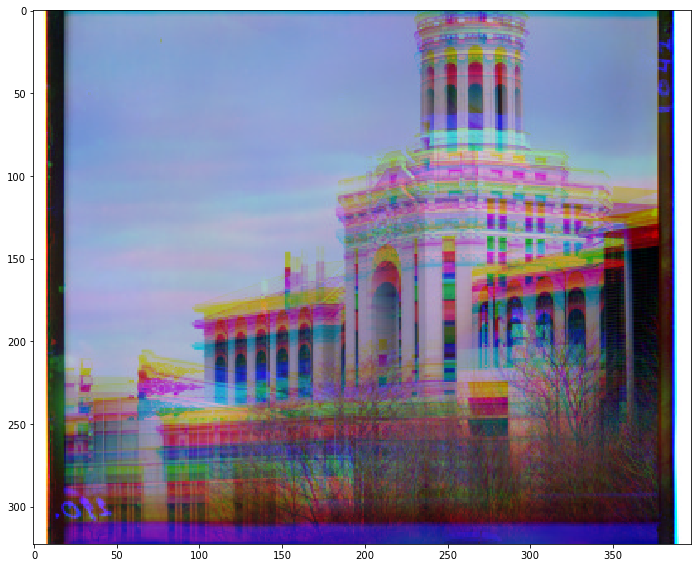

In [57]:
result = np.dstack((index[0], index[1], index[2]))
plt.figure(figsize=(10, 8))
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
imshow(result )


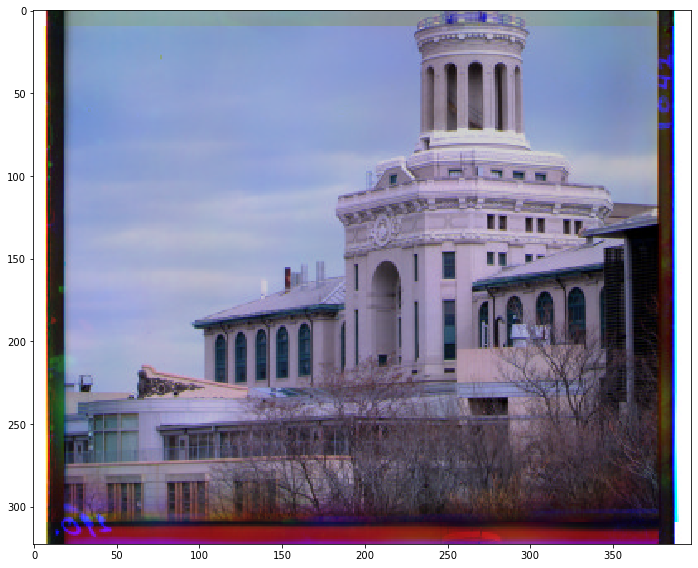

In [74]:
def alignment(img1,img2,img3):
    stack = []
    for img in (img1, img3):
        h = 0
        v = 0
        max_similarity = 0
        for i in range(-30,+30):
            for j in range(-30,30):
                rolled_mat2 = np.roll(np.roll(img,i,axis=0),j,axis=1)
                similarity = np.sum(np.corrcoef(img2.ravel(), rolled_mat2.ravel()))
                if similarity>max_similarity:
                    max_similarity = similarity
                    h = i
                    v = j
    
        stack.append(np.roll(np.roll(img,h,axis=0),v,axis=1))
    res =np.dstack((stack[0],img2,stack[1]))
    plt.figure(figsize=(10, 8))
    res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
    imshow(res)
    return res
                                    
           

result = alignment(index[0], index[1], index[2])

    

(<AxesSubplot:title={'center':'extreme bilateral + canny filter'}>,
 Text(0.5, 1.0, 'extreme bilateral + canny filter'))

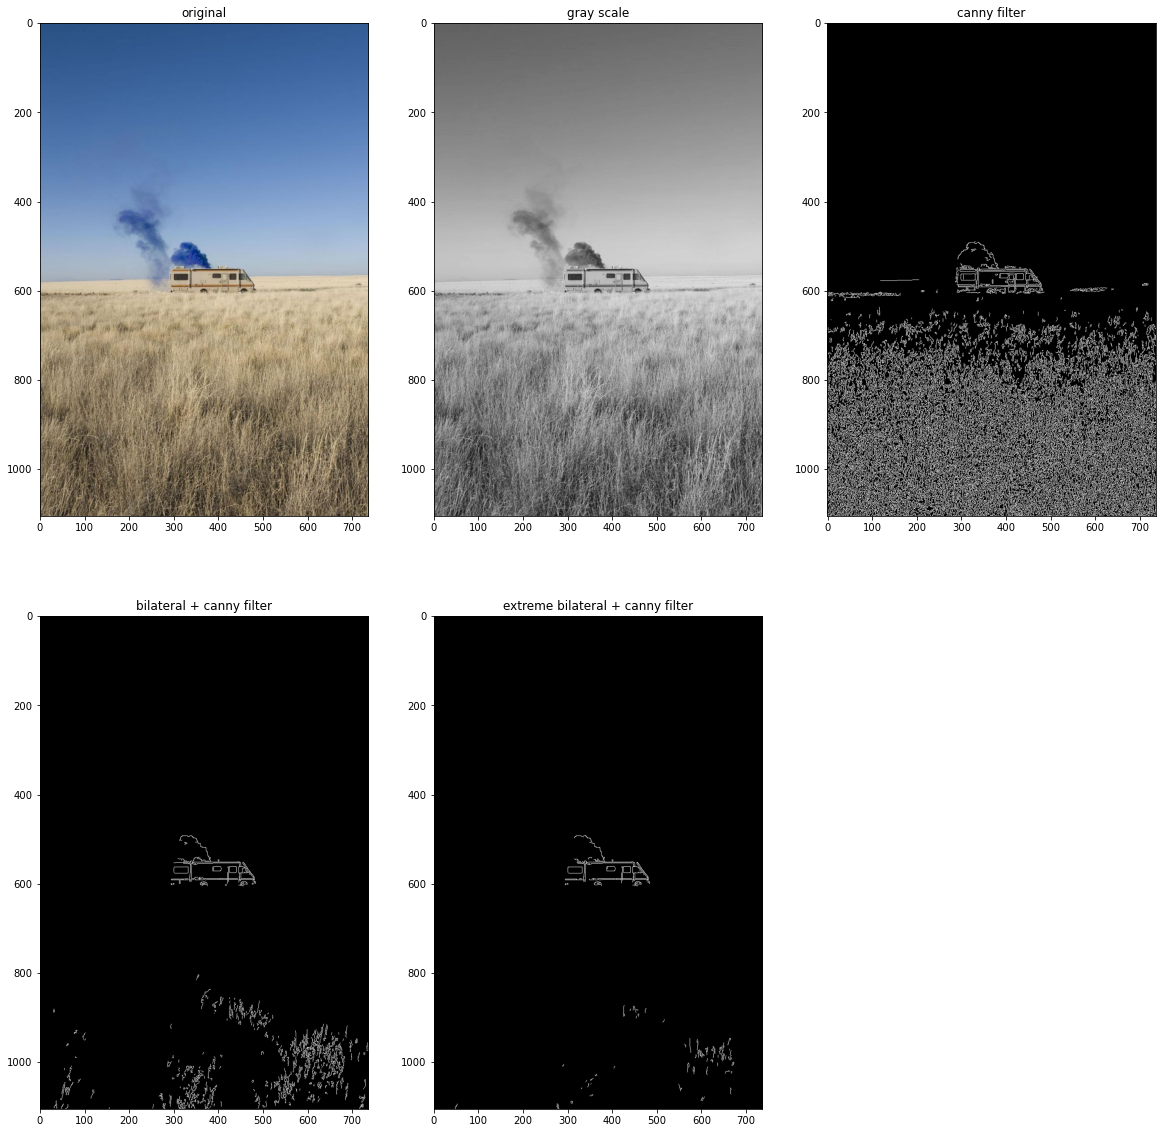

In [127]:
edge = cv2.imread(r'C:\Users\Asus\Desktop\AUT\semister 3\vision\EX\1\HW01\edge.jpg')
edge = cv2.cvtColor(edge, cv2.COLOR_BGR2RGB)
edge_gray = cv2.cvtColor(edge, cv2.COLOR_BGR2GRAY)

res1 = cv2.Canny(image=edge_gray, threshold1=100, threshold2=200)

bilateral1 = cv2.bilateralFilter(edge, 70, 140, 130)
bilateral2 = cv2.bilateralFilter(edge, 70, 170, 160)
res3 = cv2.Canny(image=bilateral1, threshold1=100, threshold2=200)
res4 = cv2.Canny(image=bilateral2, threshold1=100, threshold2=200)

plt.figure(figsize=(20,20))
plt.subplot(231),plt.imshow(edge,cmap = 'gray'),plt.title('original')
plt.subplot(232),plt.imshow(edge_gray,cmap = 'gray'),plt.title('gray scale')
plt.subplot(233),plt.imshow(res1,cmap = 'gray'),plt.title('canny filter')
plt.subplot(234),plt.imshow(res3,cmap = 'gray'),plt.title('bilateral + canny filter')
plt.subplot(235),plt.imshow(res4,cmap = 'gray'),plt.title('extreme bilateral + canny filter')

C:\Users\Asus\anaconda3\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
C:\Users\Asus\anaconda3\lib\site-packages\skimage\util\dtype.py:531: UserWarning: Downcasting int32 to uint8 without scaling because max value 254 fits in uint8
  return _convert(image, np.uint8, force_copy)


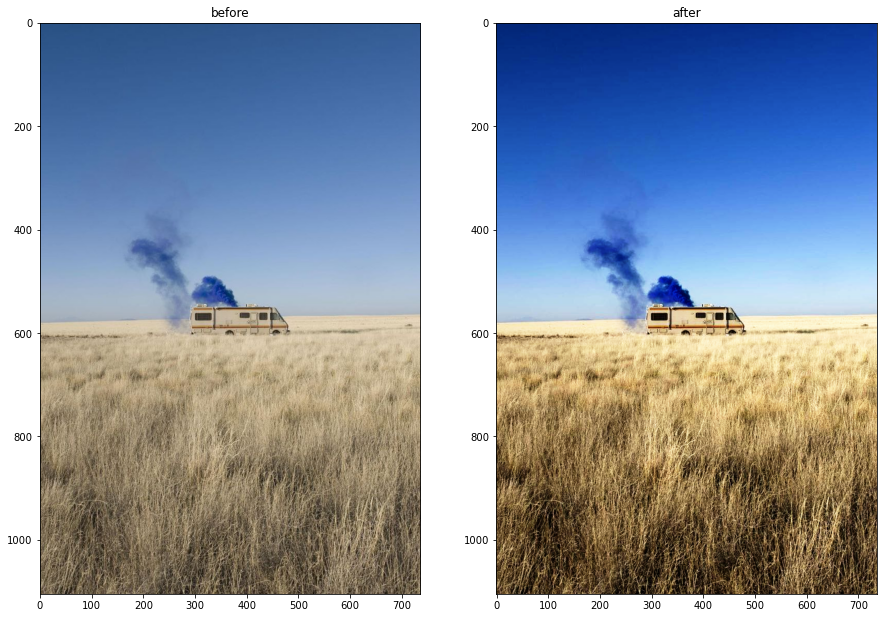

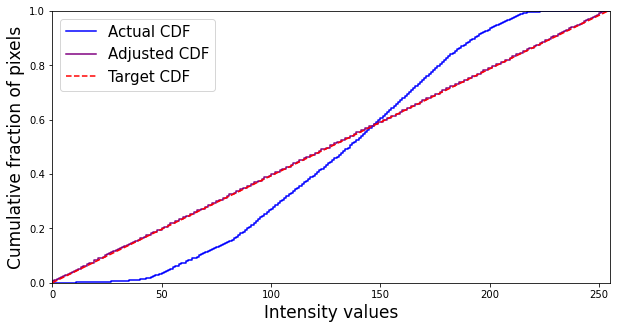

In [132]:
def histogram_equalizer(image):
    freq, bins = cumulative_distribution(image)
    target_bins = np.arange(255)
    target_freq = np.linspace(0, 1, len(target_bins))
    interpolation = np.interp(freq, target_freq, target_bins)
    image_eq = img_as_ubyte(interpolation[image].astype(int))
    freq_adj, bins_adj = cumulative_distribution(image_eq)
    
    fig, axes = plt.subplots(1, 1, figsize=(15,15));
    plt.subplot(121),plt.imshow(image,cmap = 'gray'),plt.title('before')
    plt.subplot(122),plt.imshow(image_eq,cmap = 'gray'),plt.title('after')
    
    fig, axes = plt.subplots(1, 1, figsize=(10,5));
    plt.step(bins, freq, c='blue', label='Actual CDF')
    plt.step(bins_adj, freq_adj, c='purple', label='Adjusted CDF')
    plt.plot(target_bins, 
             target_freq, 
             c='red', 
             label='Target CDF',
             linestyle = '--')
    
    plt.legend(prop={'size': 15})
    plt.xlim(0, 255)
    plt.ylim(0, 1)
    plt.xlabel('Intensity values', fontsize = 17)
    plt.ylabel('Cumulative fraction of pixels', fontsize = 17)
    
histogram_equalizer(edge)